
## Code Dependencies

In [1]:
!pip install nnfs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

## Two Hidden Layers


![](https://drive.google.com/uc?id=17dcOYX-h8fISJHQIpGSmukB0OdV-gZyY)

In [4]:
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array(
    [2.0, 3.0, 0.5]
)

# -- -------------------------------------

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array(
    [-1.0, 2.0, -0.5]
)

In [5]:
layer1_outputs = np.dot(
    inputs, 
    weights.T
)

layer1_outputs = layer1_outputs + biases

layer1_outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 1.41000003,  1.051     ,  0.02599999]])

In [6]:
layer2_outputs = np.dot(
    layer1_outputs, 
    weights2.T
)

layer2_outputs = layer2_outputs + biases2

layer2_outputs

array([[ 0.50310004, -1.04184985, -2.03874993],
       [ 0.24339998, -2.73320007, -5.76329994],
       [-0.99314   ,  1.41254002, -0.35655001]])

## Training Data

In [7]:
galaxy_arm_coordinates, galaxy_arm_class = spiral_data(
    samples=400, 
    classes=3
)

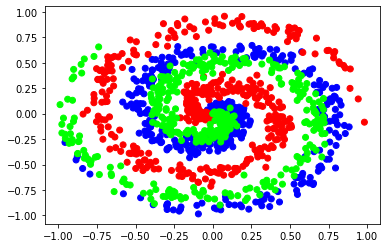

In [8]:
plt.scatter(
    galaxy_arm_coordinates[:, 0],
    galaxy_arm_coordinates[:, 1],
    c=galaxy_arm_class,
    cmap='brg'
)

plt.show()

### galaxy_arm_coordinates

In [9]:
type(galaxy_arm_coordinates)

numpy.ndarray

In [10]:
galaxy_arm_coordinates.shape

(1200, 2)

In [11]:
galaxy_arm_coordinates[:5]

array([[0.        , 0.        ],
       [0.00055951, 0.00244301],
       [0.00257495, 0.00430059],
       [0.00699585, 0.00275506],
       [0.0086152 , 0.00512642]], dtype=float32)

### galaxy_arm_class

In [12]:
type(galaxy_arm_class)

numpy.ndarray

In [13]:
galaxy_arm_class.shape

(1200,)

In [14]:
galaxy_arm_class[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

## The Code

### Dense Layer Class

**Some Notes**

- `np.random.randn` produces a **Gaussian distribution** with a mean of 0 and a variance of 1. 

- We’re going to multiply this Gaussian distribution for the weights by `0.01` to generate numbers that are a couple of magnitudes smaller. Otherwise, the model will take more time to fit the data during the training process ... (as we'll see later) ...

In [15]:
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):        
        self.output = np.dot(inputs, self.weights) + self.biases


### 1st Dense Layer

- 2 input features 
- 3 output values

In [16]:
dense1 = Layer_Dense(2, 3)

### Forward Pass

In [17]:
dense1.forward(galaxy_arm_coordinates)

### Results

In [18]:
dense1.output.shape

(1200, 3)

In [19]:
dense1.output[:5]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.0814675e-05, -3.8807790e-05, -2.0800780e-05],
       [ 4.7854114e-06, -9.9523451e-05, -1.1418167e-05],
       [-4.4856788e-05, -1.6869020e-04,  7.7414203e-05],
       [-4.4006545e-05, -2.2748367e-04,  7.4280244e-05]], dtype=float32)